# Прогноз удовлетворенности сотрудников компании «Работа с заботой».

## Описание проекта

### Цель проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. 

В данном проекте на основе данных заказчика необходимо решить 2 задачи:
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника.
2. Построить модель, которая сможет предсказать то, что сотрудник уволится из компании.

### Исходные данные

Компания-заказчик предоставила данные с характеристиками сотрудников:

- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluatio` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где `0` — совершенно неудовлетворён, `1` — полностью удовлетворён. 
- `'quit'` — увольнение сотрудника из компании, целевой признак для второй задачи.

Исходные данные представлены в виде файлов формата .csv. Данные подгружаем уже разделенные на тренировочные и тестовые:

**Для задачи №1**

Тренировочная выборка:
- `train_job_satisfaction_rate.csv`

Входные признаки тестовой выборки:
- `test_features.csv`

Целевой признак тестовой выборки:
- `test_target_job_satisfaction_rate.csv`

**Для задачи №2**

Тренировочная выборка:
- `train_quit.csv`

Тестовая выборка (входные признаки те же, что и в прошлой задаче):
- `test_features.csv`

Целевой признак тестовой выборки:
- `test_target_quit.csv`


### Этапы проекта

Решать поставленные задачи будем в следующем порядке:
1. построим модель, которая сможет предсказать уровень удовлетворённости сотрудника;
2. построим модель, которая сможет предсказать, что сотрудник уволится из компании.

О качестве данных ничего не известно. Перед тем как приступить к разработке модели машинного обучения, понадобится обзор данных и, при необходимости, предобработка.

Таким образом проект пройдет в следующие этапы:

- Обзор данных.
- Предобработка данных.
- Задача 1.
  - Исследовательский анализ данных.
  - Обучение моделей.
- Задача 2.
  - Исследовательский анализ данных.
  - Обучение моделей.
- Общий вывод.

## Обзор данных

### Получение данных

Загрузим данные из csv-файлов в датафреймы c помощью библиотеки pandas.

In [1]:
# библиотеки и обновления, установленные на сервере самостоятельно, слетают, поэтому ячейка всегда активна.
!pip install -U scikit-learn
!pip install phik


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 667.1/667.1 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
## импортируем необходимые библиотеки----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

## из библиотек импортируем необходимые функции и классы---------------------------------
from scipy import stats as st
from matplotlib.pyplot import figure
from math import factorial, sqrt

# загружаем функции
from sklearn.model_selection import train_test_split
from scipy.stats import binom, norm
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# загружаем инструменты для автоподбора гиперпараметров
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV
)

# загружаем классы моделей
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR 

# загружаем метрики
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error, 
    r2_score,
    accuracy_score,
    confusion_matrix,
    recall_score, 
    precision_score,
    roc_auc_score,
    make_scorer # создание пользовательской метрики
)

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import (
    SelectKBest,
    chi2,
    f_classif,
    mutual_info_classif 
)

# загружаем класс для работы с пайплайнами
from sklearn.pipeline import Pipeline

# загружаем классы для преобразования данных
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder
)    
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

## константы----------------------------------------------------------------------------
RANDOM_STATE = 42  # константа для фиксации данных при обучении моделей, чтобы получать одинаковые результаты при пересчёте и

Cоздаем датафреймы из файлов .csv

In [3]:
# Задача №1
# Тренировочная выборка
train_1  = pd.read_csv('train_job_satisfaction_rate.csv')

# Входные признаки тестовой выборки (для второй задачи они же)
X_test_1_2 = pd.read_csv('test_features.csv')

# Целевой признак тестовой выборки
y_test_1 = pd.read_csv('test_target_job_satisfaction_rate.csv')

In [4]:
# Задача №2
# Тренировочная выборка
train_2  = pd.read_csv('train_quit.csv')

# Целевой признак тестовой выборки
y_test_2 = pd.read_csv('test_target_quit.csv')

### Общая информация

**Выведем первые строки каждого датафрейма и получим общую информацию.**

**Рассмотрим датафрейм `train_1` (файл `train_job_satisfaction_rate.csv`).**

In [5]:
train_1.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [6]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


**Вывод:**
- Обнаружены пропуски в столбах:
  - `'dept'`;
  - `'level'`.
- Названия столбцов корректны.
- Столбцы `'last_year_promo'`, `'last_year_violations'` должны иметь булев тип.

**Рассмотрим датафрейм `X_test_1_2` (файл `test_features.csv`).**

In [7]:
X_test_1_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [8]:
X_test_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


**Вывод:**
- Обнаружены пропуски в столбах:
  - `'dept'`;
  - `'level'`.
- Названия столбцов корректны.
- Столбцы `'last_year_promo'`, `'last_year_violations'` должны иметь булев тип.

**Рассмотрим датафрейм `y_test_1` (файл `test_target_job_satisfaction_rate.csv`).**

In [9]:
y_test_1.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [10]:
y_test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


**Вывод:**
- Пропусков не обнаружено.
- Названия столбцов корректны.
- Столбцы имеют правильный тип данных.

**Рассмотрим датафрейм `train_2` (файл `train_quit.csv`).**

In [11]:
train_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [12]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


**Вывод:**
- Пропусков не обнаружено.
- Названия столбцов корректны.
- Столбцы `'last_year_promo'`, `'last_year_violations'`, `'quit'` должны иметь булев тип.

**Рассмотрим датафрейм `y_test_2` (файл `test_target_quit.csv`).**

In [13]:
y_test_2.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [14]:
y_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Вывод:**
- Пропусков не обнаружено.
- Названия столбцов корректны.
- Столбец `'quit'` должен иметь булев тип.

**Итог:**

- В датафреймах обнаружено незначительное количество пропусков, которые заполним в пайплайне.
- Некоторые столбцв должны быть представлены булевым типом, но и тип `object` для наших целей вполне подойдет.
- Тренировочные и тестовые выборки по обеим задачам имеют одинаковые размеры:
  - тренировочная: 4000 строк.
  - тестовая     : 2000 строк.

##  Предобработка данных

### Проверка на дубликаты

Проверим данные на наличие дубликатов (явных и неявных). Обработаем дубликаты в случае обнаружения.

**Проверка на явные дубликаты.**

In [15]:
# создадим список датафреймов  для дальнейшей проверки в цикле
list_=[train_1, X_test_1_2, y_test_1, train_2, y_test_2]

# создадим функцию для извлечения имени датафреймов из списка
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# проверяем все датафреймы на явные дубликаты
for i in list_:
    print(f'{get_df_name(i):12} {i.duplicated().sum()}')

train_1      0
X_test_1_2   0
y_test_1     0
train_2      0
y_test_2     0


**Вывод:**

Явных дубликатов не обнаружено. Проверим дублирующиеся `id`.

**Проверка на неявные дубликаты.**

In [16]:
# проверяем дублирующиеся 'id' во всех датафреймах
for i in list_:
    print(f'{get_df_name(i):10}["id"]: {i["id"].duplicated().sum()}')

train_1   ["id"]: 0
X_test_1_2["id"]: 0
y_test_1  ["id"]: 0
train_2   ["id"]: 0
y_test_2  ["id"]: 0


Дублирующихся `id` не обнаружено.

Выведем все уникальные значения столбцов, которые могут содержать неявные дубликаты.

In [17]:
# создадим список всех столбцов, которые могут содержать неявные дубликаты
list_1 = [
    "dept",
    "level",
    "workload",
    "last_year_promo",
    "last_year_violations",
    "quit"
]

# если в датафрейме есть столбец из списка list_1
# то выводим уникальные значения этого столбца
# и так в цикле проходим по всем датафреймам
for i in list_:
    for k in list_1:
        if k in i.columns:
            print(f'{get_df_name(i)} ["{k}"]:\n{i[k].value_counts()}\n') 

train_1 ["dept"]:
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

train_1 ["level"]:
junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

train_1 ["workload"]:
medium    2066
low       1200
high       734
Name: workload, dtype: int64

train_1 ["last_year_promo"]:
no     3880
yes     120
Name: last_year_promo, dtype: int64

train_1 ["last_year_violations"]:
no     3441
yes     559
Name: last_year_violations, dtype: int64

X_test_1_2 ["dept"]:
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64

X_test_1_2 ["level"]:
junior    974
middle    854
sinior    171
Name: level, dtype: int64

X_test_1_2 ["workload"]:
medium    1043
low        593
high       363
             1
Name: workload, dtype: int64

X_test_1_2 ["last_year_promo"]:
no     1937
yes      63
Name: last_year_promo, dtype: int64

X_test_1_2 ["last_year_violat

**Вывод:**

- Неявных дубликатов не обнаружено.
- В датафрейме `X_test_1_2`  в столбцах  `"dept"` и `"workload"` обнаружены пустые значения по 1 шт. в каждом столбце.
- Нужно исправить значение `"sinior"` на `"senior"` в датафреймах, где есть столбец `'level'`.

### Обработка некорректных значений

Обработаем обнаруженные пробелы вместо данных в датафрейме `X_test_1_2`.

In [18]:
# выведем количество пропусков в датафрейме X_test_1_2
X_test_1_2.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [19]:
# выведем строки с пропусками
X_test_1_2[X_test_1_2.isna().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


Поскольку заменять пропуски будем в пайплайне, то пробелы тоже заменим пропусками и затем обработаем их в пайплайне вместе с остальными.

Найдем строки с пробелами.

In [20]:
X_test_1_2[X_test_1_2["dept"] == " "]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
1699,822186,,middle,medium,3,no,no,4,38400


In [21]:
X_test_1_2[X_test_1_2["workload"] == " "]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800


Заменим пробелы пропусками.

In [22]:
X_test_1_2 = X_test_1_2.replace(' ', np.NaN)

In [23]:
# выведем количество пропусков в датафрейме X_test_1_2
X_test_1_2.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Проверим уникальные значения в исправленных столбцах.

In [24]:
X_test_1_2["dept"].value_counts()

sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

In [25]:
X_test_1_2["workload"].value_counts()

medium    1043
low        593
high       363
Name: workload, dtype: int64

In [26]:
# заменяем 'sinior' на 'senior'
for i in [train_1, X_test_1_2, train_2]:
    i['level'] = i['level'].replace('sinior', 'senior')

In [27]:
train_1['level'].value_counts()

junior    1894
middle    1744
senior     358
Name: level, dtype: int64

In [28]:
X_test_1_2['level'].value_counts()

junior    974
middle    854
senior    171
Name: level, dtype: int64

In [29]:
train_2['level'].value_counts()

junior    1949
middle    1694
senior     357
Name: level, dtype: int64

**Вывод:**

- В датафрейме `X_test_1_2`  в столбцах  `"dept"` и `"workload"` некорректные значения заменены на NaN для последующей обработки вместе с остальными пропусками в пайплайне.
- Значения `"sinior"` в столбцах `'level'` заменены на `"senior"`.

**Итог:**

Предобработка данных завершена:
- Дубликаты не обнаружены.
- Обнаружены ошибки в столбцах: пробелы вместо данных, ошибка в названии должности.
- Некорректные значения в столбцах заменены на NaN для последующей обработки вместе с остальными пропусками в пайплайне, ошибка в названии должности исправлена.

## Задача 1. Прогноз уровня удовлетворённости сотрудников

### Исследовательский анализ данных

Исследуем датафреймы для решения задачи №1:
- `train_1`;
- `X_test_1_2`;
- `y_test_1`.

Создадим функцию `barh` для для построения горизонтальных столбчатых диаграмм.

In [30]:
## строим диаграмму, подписываем и расставляем значения столбцов
def barh(data, size_x, size_y, title, xlabel, ylabel, legend_loc=0):
    df = pd.DataFrame(data)
    ax = df.plot(kind='barh') 
    
    # функция для подписывания столбцов, передаем сумму длин прямоугольников 
    # для подсчета процентного соотношения
    def annotate(sum_width):
        ax.annotate(
                (f'{p.get_width()} ({(p.get_width()/sum_width*100).round(1)}%)'), 
                (p.get_x() + p.get_width() + max_* 0.02 , p.get_y() + p.get_height() * 0.5), 
                ha='left', 
                va='center', 
                color='black');
    
    # считаем длины прямоугольников, суммируем половину для подсчета процентного соотношения
    # ищем максимальную длину для автоматического масштабирования графиков
    a, b, count, max_ = 0, 0, 0, 0
    
    for i in ax.patches:
        width = i.get_width()
        count += 1
        if count <= len(ax.patches)/2:
            a += width 
        if count > len(ax.patches)/2:
            b += width  
        if width > max_:
            max_ = width
            
    # подписываем значения столбцов и рассчитываем процентное соотношение       
    count = 0
    for p in ax.patches:
        count += 1
        if count <= len(ax.patches)/2:
            annotate(sum_width=a)
        if count > len(ax.patches)/2:
            annotate(sum_width=b)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # положение легенды, если задано
    if legend_loc:    
        plt.legend(loc=legend_loc)
    
    plt.margins(0.3)          # увеличиваем расстояние до края
    fig = plt.gcf()           # увеличиваем размеры графика
    fig.set_size_inches(size_x, size_y)  # увеличиваем размеры графика
    
    plt.show()
    
    return df # выводим объединенный датафрейм для анализа

#### Количество сотрудников

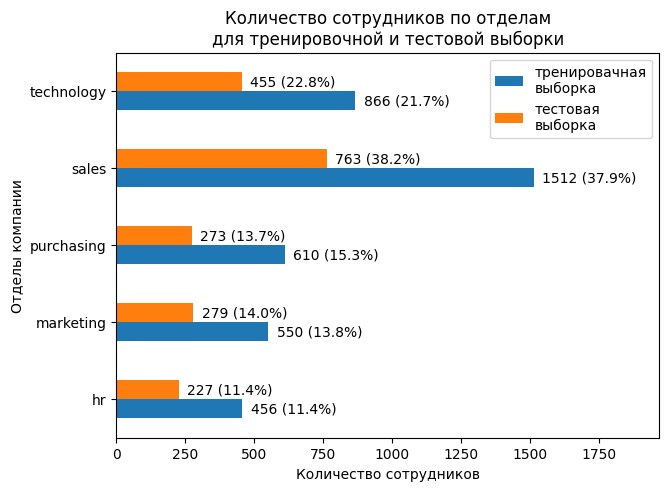

In [31]:
data = {'тренировачная\nвыборка': train_1['dept'].value_counts().sort_values(),
        'тестовая\nвыборка': X_test_1_2['dept'].value_counts().sort_values()}    
    
df = barh(data=data, size_x=7, size_y=5,
          title="Количество сотрудников по отделам\nдля тренировочной и тестовой выборки",
          xlabel="Количество сотрудников",
          ylabel="Отделы компании")

**Вывод:**

- Больше всего сотрудников работает в технологическом отделе и отделе продаж, меньше всего - в отделе кадров.
- Распределение сотрудников по отделам в тренировочной и тестовой выборке различается не существенно.

#### Уровень занимаемой должности

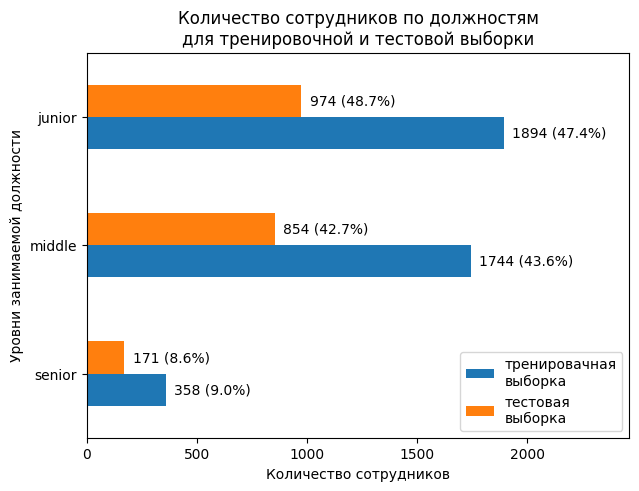

In [32]:
data = {'тренировачная\nвыборка': train_1['level'].value_counts().sort_values(),
        'тестовая\nвыборка': X_test_1_2['level'].value_counts().sort_values()}    
    
df = barh(data=data, size_x=7, size_y=5,
          title="Количество сотрудников по должностям\nдля тренировочной и тестовой выборки",
          xlabel="Количество сотрудников",
          ylabel="Уровни занимаемой должности")

**Вывод:**

- Больше всего сотрудников работает на позиции junior, чуть меньше - middle.
- Распределение сотрудников по должностям в тренировочной и тестовой выборке различается не существенно.

#### Уровень загруженности сотрудника

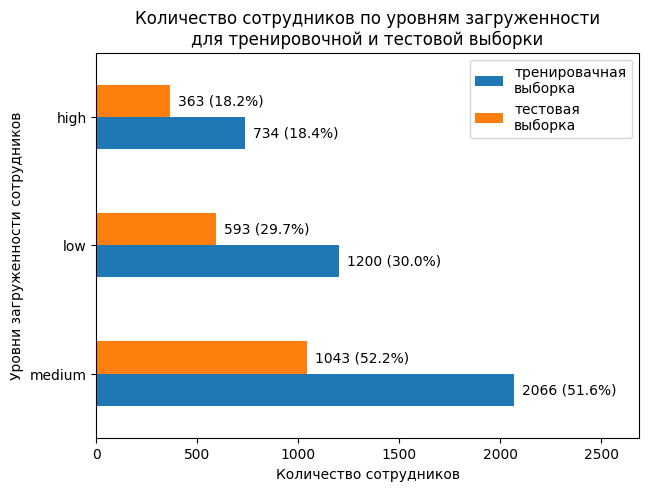

In [33]:
data = {'тренировачная\nвыборка': train_1['workload'].value_counts(),
        'тестовая\nвыборка': X_test_1_2['workload'].value_counts()}    
    
df = barh(data=data, size_x=7, size_y=5,
          title="Количество сотрудников по уровням загруженности\nдля тренировочной и тестовой выборки",
          xlabel="Количество сотрудников",
          ylabel="Уровни загруженности сотрудников")

**Вывод:**

- Больше половины сотрудников имеют среднюю загруженность.
- Распределение сотрудников по загруженности в тренировочной и тестовой выборке различается не существенно.

#### Длительность работы в компании (в годах)

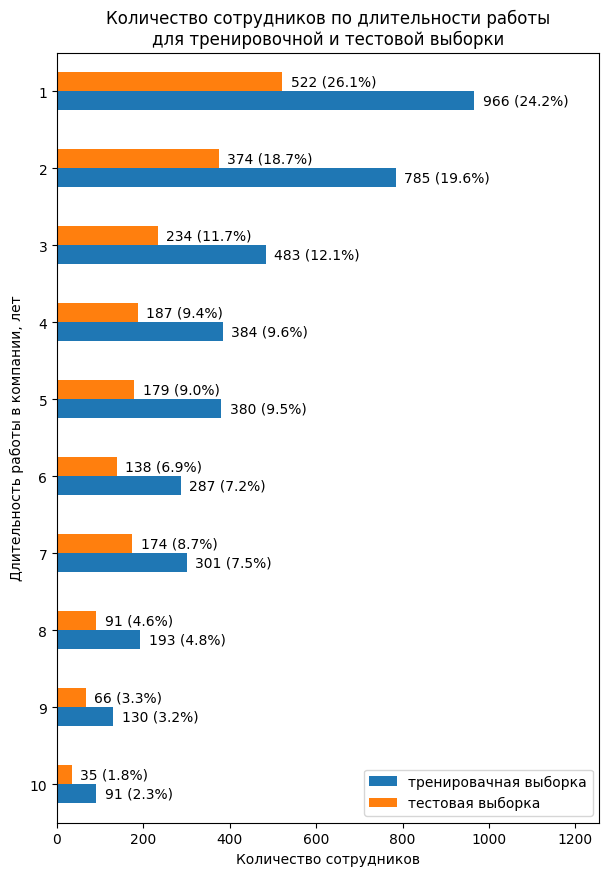

In [34]:
data = {'тренировачная выборка': train_1['employment_years'].value_counts().sort_index(ascending=False),
        'тестовая выборка': X_test_1_2['employment_years'].value_counts().sort_index(ascending=False)}    
    
df = barh(data=data, size_x=7, size_y=10,
          title="Количество сотрудников по длительности работы\nдля тренировочной и тестовой выборки",
          xlabel="Количество сотрудников",
          ylabel="Длительность работы в компании, лет")

In [35]:
# выведем основные описательные статистики
pd.merge(train_1['employment_years'].describe(), 
         X_test_1_2['employment_years'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_train', '_test'))

,employment_years_train,employment_years_test
count,4000.000000,2000.000000
mean,3.718500,3.666500
std,2.542513,2.537222
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,3.000000
75%,6.000000,6.000000
max,10.000000,10.000000


**Вывод:**

- Половина сотрудников работают не более трёх лет. Средний срок работы ≈ 2,5 года.
- Распределение сотрудников по длительности работы в компании в тренировочной и тестовой выборке различается несущественно.

#### Наличие повышений в должности за последний год

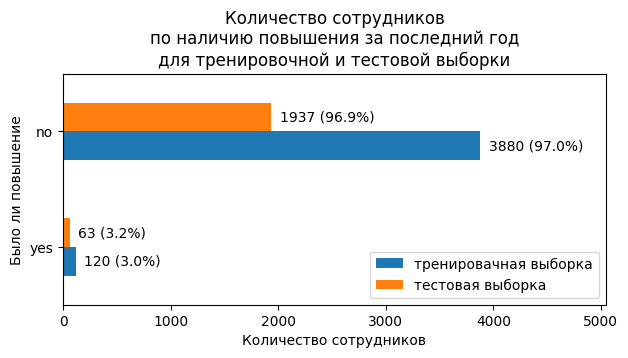

In [36]:
data = {'тренировачная выборка': train_1['last_year_promo'].value_counts().sort_index(ascending=False),
        'тестовая выборка': X_test_1_2['last_year_promo'].value_counts().sort_index(ascending=False)}    
    
df = barh(data=data, size_x=7, size_y=3, legend_loc='lower right', 
          title="Количество сотрудников\nпо наличию повышения за последний год\nдля тренировочной и тестовой выборки",
          xlabel="Количество сотрудников",
          ylabel="Было ли повышение")

**Вывод:**

- Лишь около трёх процентов сотрудников повысили за последний год.
- Распределение сотрудников по наличию повышения в тренировочной и тестовой выборке различается несущественно.

#### Наличие нарушений трудового договора за последний год

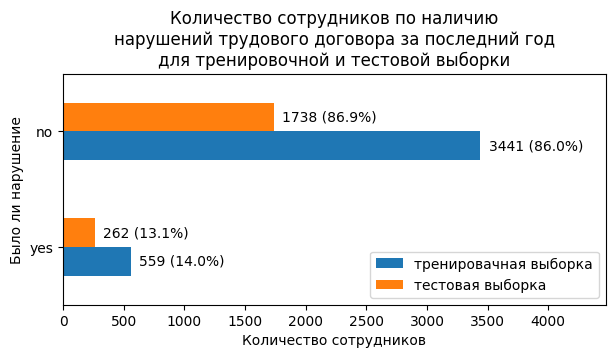

In [37]:
data = {'тренировачная выборка': train_1['last_year_violations'].value_counts().sort_index(ascending=False),
        'тестовая выборка': X_test_1_2['last_year_violations'].value_counts().sort_index(ascending=False)}    
    
df = barh(data=data, size_x=7, size_y=3, legend_loc='lower right', 
          title="Количество сотрудников по наличию\nнарушений трудового договора за последний год\nдля тренировочной и тестовой выборки",
          xlabel="Количество сотрудников",
          ylabel="Было ли нарушение")

**Вывод:**

- Более 13% сотрудников нарушили трудовой договор за последний год.
- Распределение сотрудников по наличию нарушений трудового договора в тренировочной и тестовой выборке различается несущественно.

#### Оценка качества работы сотрудника, которую дал руководитель

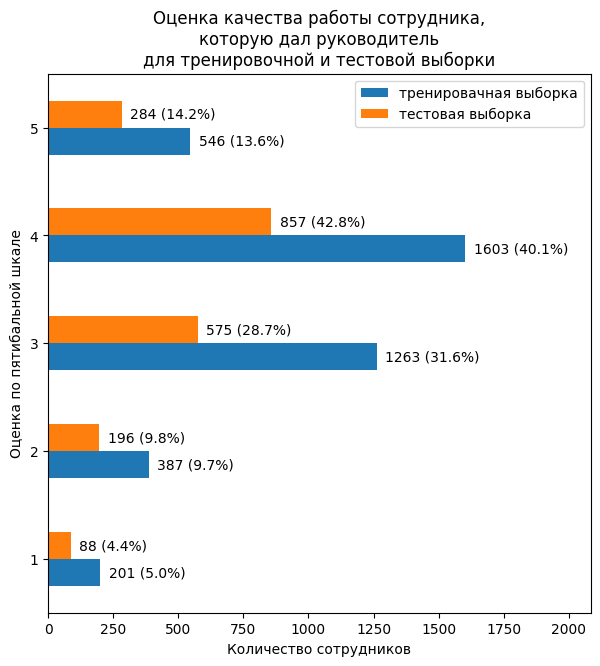

In [38]:
data = {'тренировачная выборка': train_1['supervisor_evaluation'].value_counts().sort_index(),
        'тестовая выборка': X_test_1_2['supervisor_evaluation'].value_counts().sort_index()}    
    
df = barh(data=data, size_x=7, size_y=7, legend_loc='best', 
          title="Оценка качества работы сотрудника,\nкоторую дал руководитель\nдля тренировочной и тестовой выборки",
          xlabel="Количество сотрудников",
          ylabel="Оценка по пятибальной шкале")

In [39]:
# выведем основные описательные статистики
pd.merge(train_1['supervisor_evaluation'].describe(), 
         X_test_1_2['supervisor_evaluation'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_train', '_test'))

,supervisor_evaluation_train,supervisor_evaluation_test
count,4000.000000,2000.000000
mean,3.476500,3.526500
std,1.008812,0.996892
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,4.000000,4.000000
max,5.000000,5.000000


**Вывод:**

- Самая популярная оценка  - четвёрка. Средняя оценка ≈ 3,5.
- Распределение сотрудников по оценкам в тренировочной и тестовой выборке различается несущественно.

#### Ежемесячная заработная плата сотрудника

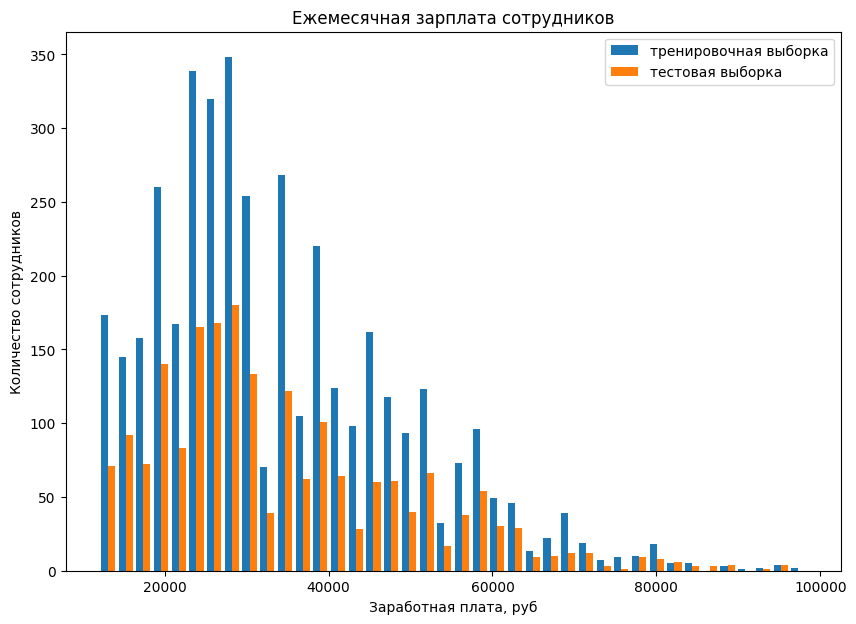

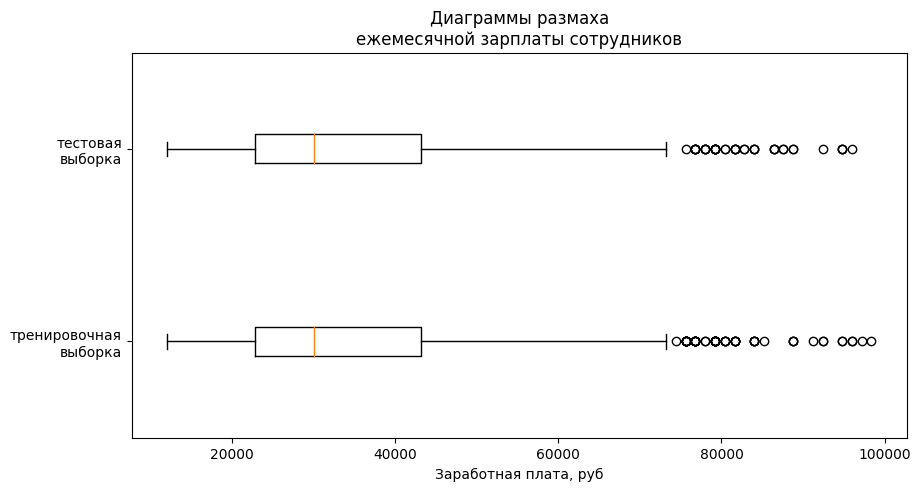

,salary_train,salary_test
count,4000.000000,2000.000000
mean,33926.700000,34066.800000
std,14900.703838,15398.436729
min,12000.000000,12000.000000
25%,22800.000000,22800.000000
50%,30000.000000,30000.000000
75%,43200.000000,43200.000000
max,98400.000000,96000.000000


In [40]:
# построим гистограмму 
plt.hist([train_1['salary'], X_test_1_2['salary']], 
         bins=40, 
         label=['тренировочная выборка', 'тестовая выборка'])
plt.legend(loc='upper right')
plt.title('Ежемесячная зарплата сотрудников')
plt.xlabel('Заработная плата, руб')
plt.ylabel('Количество сотрудников')
fig = plt.gcf()
fig.set_size_inches(10,7) 
plt.show()

# строим диаграмму размаха 
plt.boxplot([train_1['salary'], X_test_1_2['salary']], 
           labels=('тренировочная\nвыборка','тестовая\nвыборка'),
           vert=0)
plt.title('Диаграммы размаха\nежемесячной зарплаты сотрудников')
plt.xlabel('Заработная плата, руб')
fig = plt.gcf()
fig.set_size_inches(10,5) 
plt.show()

# выведем основные описательные статистики
pd.merge(train_1['salary'].describe(), 
         X_test_1_2['salary'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_train', '_test'))

**Вывод:**

- Медианная зарплата равняется 30 тыс.руб. для обоих выборок.
- Имеются выбросы вверх, но не критичные.
- Графики распределения заработной платы для тренировочной и тестовой выборки схожи.

####  Уровень удовлетворённости сотрудника работой в компании

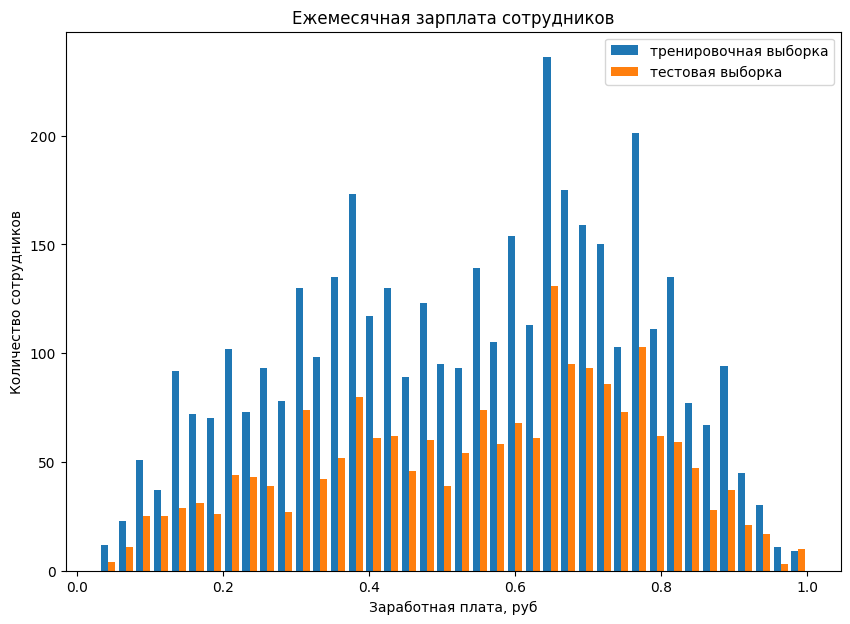

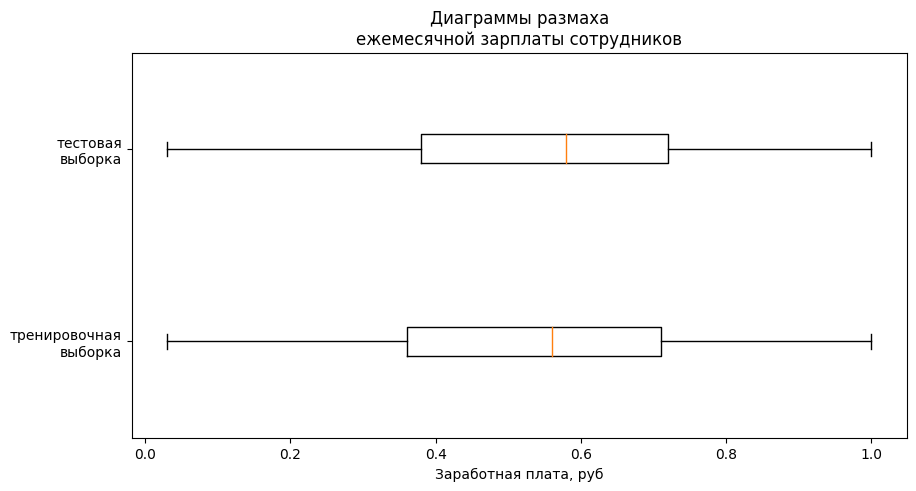

,job_satisfaction_rate_train,job_satisfaction_rate_test
count,4000.000000,2000.00000
mean,0.533995,0.54878
std,0.225327,0.22011
min,0.030000,0.03000
25%,0.360000,0.38000
50%,0.560000,0.58000
75%,0.710000,0.72000
max,1.000000,1.00000


In [41]:
# построим гистограмму 
plt.hist([train_1['job_satisfaction_rate'], 
          y_test_1['job_satisfaction_rate']], 
         bins=40, 
         label=['тренировочная выборка', 'тестовая выборка'])
plt.legend(loc='upper right')
plt.title('Ежемесячная зарплата сотрудников')
plt.xlabel('Заработная плата, руб')
plt.ylabel('Количество сотрудников')
fig = plt.gcf()
fig.set_size_inches(10,7) 
plt.show()

# строим диаграмму размаха 
plt.boxplot([train_1['job_satisfaction_rate'], 
             y_test_1['job_satisfaction_rate']], 
           labels=('тренировочная\nвыборка','тестовая\nвыборка'),
           vert=0)
plt.title('Диаграммы размаха\nежемесячной зарплаты сотрудников')
plt.xlabel('Заработная плата, руб')
fig = plt.gcf()
fig.set_size_inches(10,5) 
plt.show()

# выведем основные описательные статистики
pd.merge(train_1['job_satisfaction_rate'].describe(), 
         y_test_1['job_satisfaction_rate'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_train', '_test'))

**Вывод:**

- Средний уровень удовлетворенности сотрудников чуть выше 0,5.
- Графики распределения признака схожи для тренировочной и тестовой выборки.

**Итог:**

Исследовательский анализ завершен. Данные выглядят корректными и готовыми для построения моделей МО.

### Корреляционный анализ

Построим матрицу корреляции на данных обучающей выборки `train_1` с помощью библиотеки `phik`.

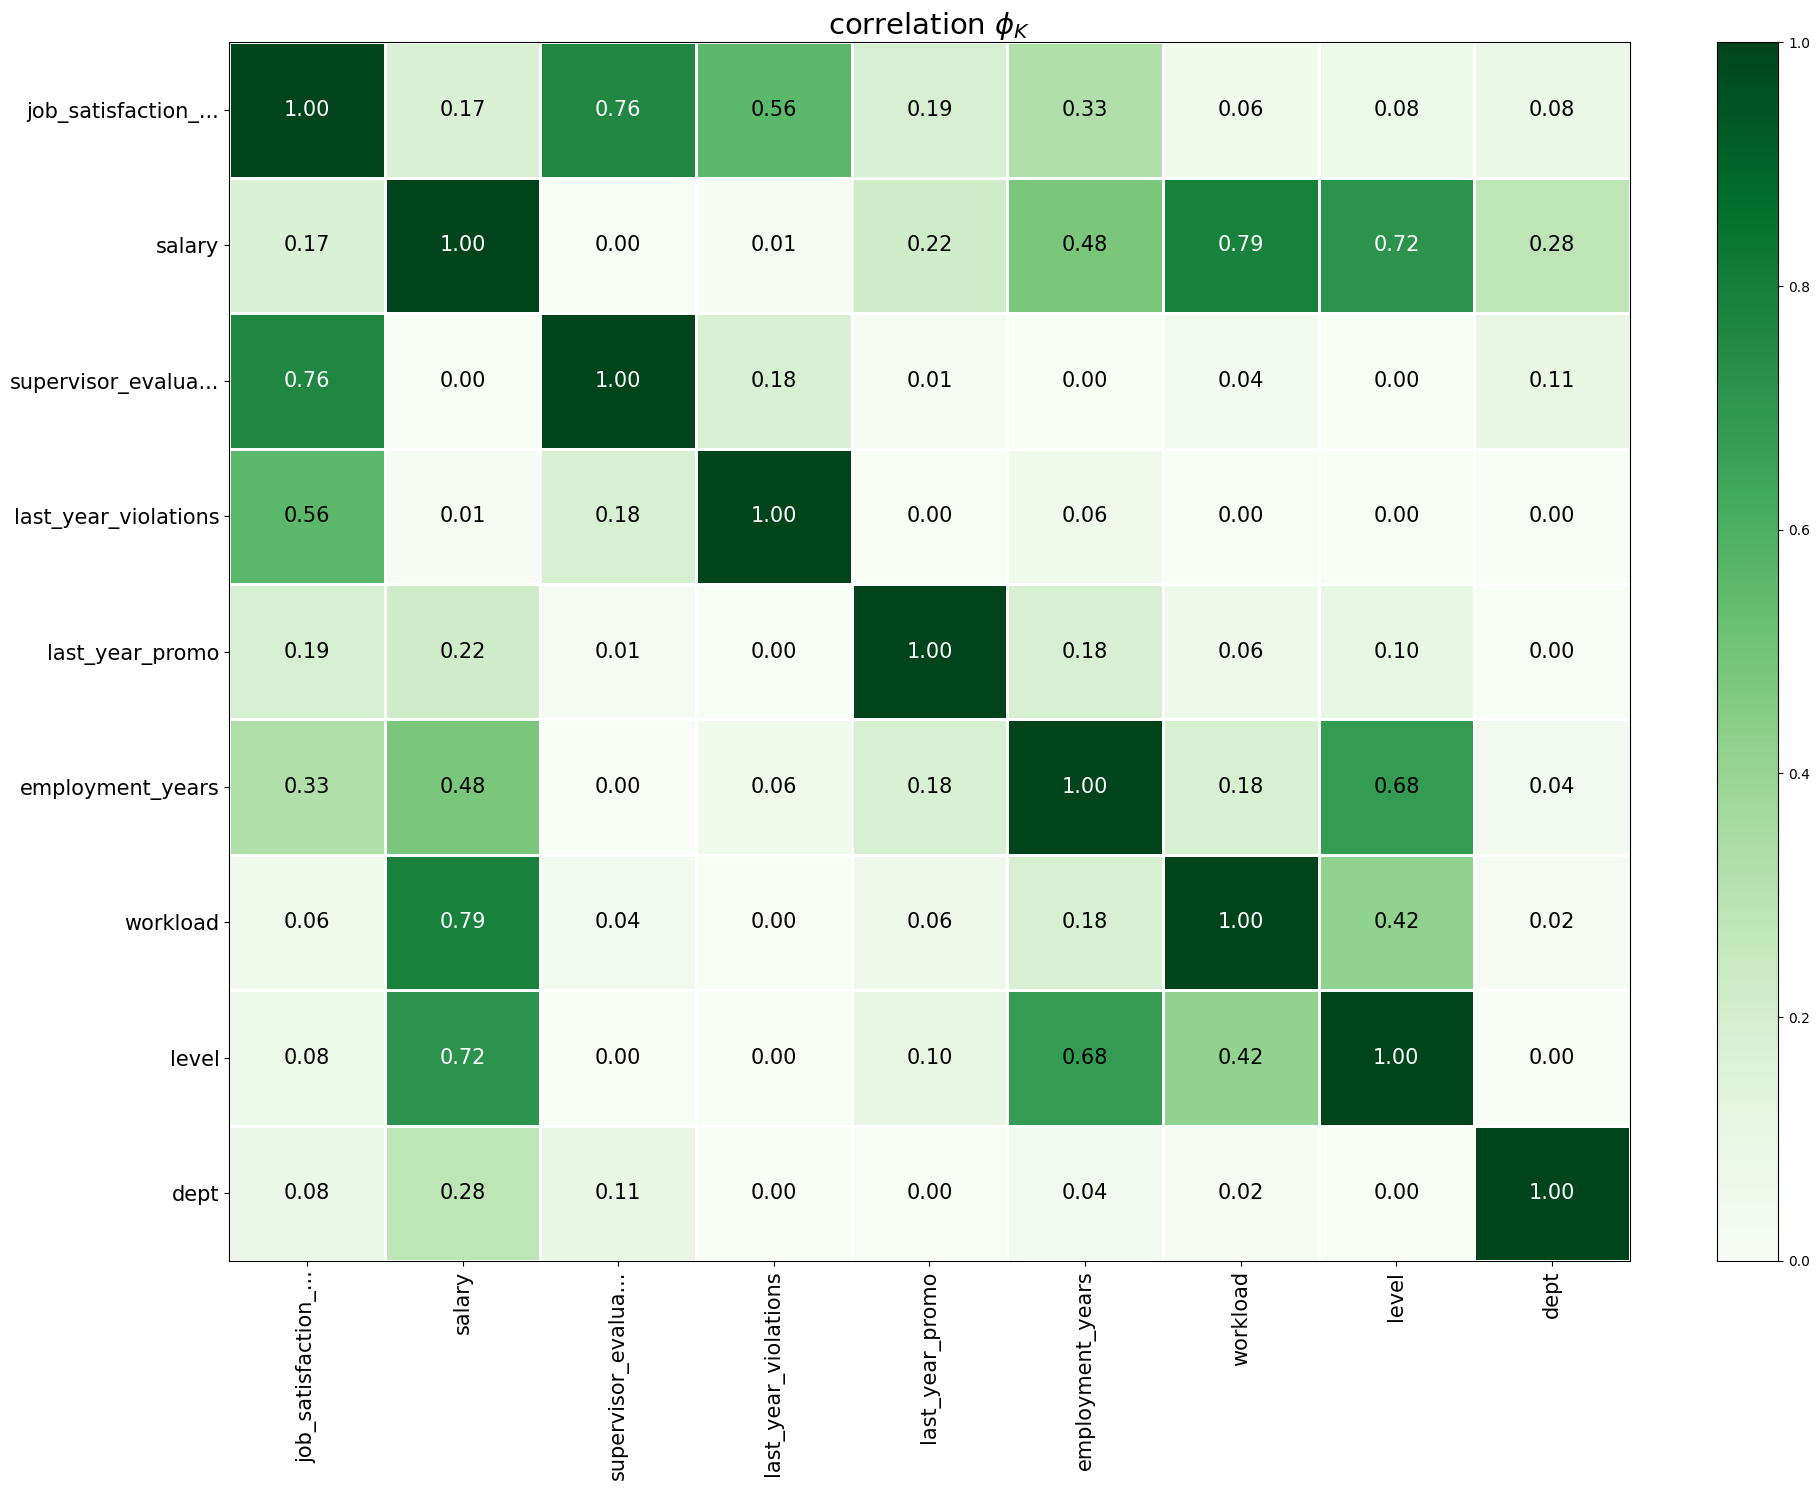

In [42]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['salary', 'job_satisfaction_rate']

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(train_1.loc[:, train_1.columns != 'id'], interval_cols=interval_cols) 

# строим матрицу
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15))

**Вывод:**

Высокую корреляцию наблюдаем между следующими признаками: 
- зарплата и уровень занимаемой должности;
- зарплата и уровень загруженности сотрудника;
- уровень удовлетворенности сотрудника и оценка его работы руководителем.

Связи между признаками недостаточно сильные, чтобы предположить наличие мультиколлинеарности. Максимальный коэффициент корреляции = 0.78. 

Мультиколлинеарность маловероятна, данные готовы к моделированию.

### Обучение моделей

Построим модель, которая сможет предсказать уровень удовлетворённости сотрудника.

**Целевой признак:**  `уровень удовлетворённости сотрудника работой в компании` (job_satisfaction_rate). Необходимо предсказать значение этого признака, который может находиться в диапазоне от 0 до 1.

Основные операции будем выполнять в пайплайне:

1. Подготовим данные. При кодировании используем два кодировщика.

2. Обучим две линейных модели и модель дерева решений:
  - **LinearRegression**;
  - **SVR**;
  - **DecisionTreeRegressor**.

Для выбора лучшей модели будем считать метрику **`sMAPE`**. Напишем функцию для расчета этой метрики и используем её при подборе гиперпараметров. Критерий успеха: sMAPE ≤15 на тестовой выборке.

Проверим, совпадают ли столбцы `id` в тестовой выборке.

In [43]:
X_test_1_2['id'].equals(y_test_1['id'])

False

Значения в столбцах не соответствуют друг другу, это может быть связано с разной индексацией. Объединим данные по столбцу `'id'`, чтобы привести их в соответствие и сохраним в датафрейм `test_1`.

In [44]:
# объединяем датафреймы по столбцу 'id'
test_1 = X_test_1_2.merge(
    y_test_1,
    on='id',
    how='inner')

In [45]:
# установим в качестве индекса 'id'
train_1 = train_1.set_index('id')
test_1 = test_1.set_index('id')

In [46]:
# выведем первые строки
test_1.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64


In [47]:
# выведем информацию о новом датафрейме
test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   1997 non-null   object 
 1   level                  1999 non-null   object 
 2   workload               1999 non-null   object 
 3   employment_years       2000 non-null   int64  
 4   last_year_promo        2000 non-null   object 
 5   last_year_violations   2000 non-null   object 
 6   supervisor_evaluation  2000 non-null   int64  
 7   salary                 2000 non-null   int64  
 8   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 156.2+ KB


In [48]:
train_1.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11


In [49]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB


Объединение прошло корректно. В качестве индексов для тренировочной и тестовой выборок установлен `'id'`.

После того, как `'id'` стал индексом, проверим данные тренировочной выборки на наличие явных дубликатов.

In [50]:
# выведем количество явных дубликатов
train_1.duplicated().sum()

245

В тренировочной выборке обнаружены дубликаты, удалим их.

In [51]:
# удалим явные дубликаты
train_1 = train_1.drop_duplicates()

In [52]:
# выведем общую информацию 
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3749 non-null   object 
 1   level                  3751 non-null   object 
 2   workload               3755 non-null   object 
 3   employment_years       3755 non-null   int64  
 4   last_year_promo        3755 non-null   object 
 5   last_year_violations   3755 non-null   object 
 6   supervisor_evaluation  3755 non-null   int64  
 7   salary                 3755 non-null   int64  
 8   job_satisfaction_rate  3755 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 293.4+ KB


Явные дубликаты удалены. Выборка сократилась незначительно.

В пайплайне необходимо обработать пропуски в следующих столбцах:
- `dept`;
- `level`;
- `workload`.

Заполним пропуски наиболее часто встречающимися значениями.

In [53]:
# создадим функцию для подсчета sMAPE
def smape_metric(y_test, y_pred) -> float:
    
    # конвертируем данные в объекты numpy array data type
    if not all([isinstance(y_test, np.ndarray),
                isinstance(y_pred, np.ndarray)]): 
        y_test, y_pred = np.array(y_test), np.array(y_pred) 
    
    return round(np.mean(np.abs(y_pred - y_test) / 
            ((np.abs(y_pred) + np.abs(y_test)) / 2))*100, 2) 

In [54]:
# скрываем предупреждения
warnings.filterwarnings('ignore')

## делим данные на тренировочные и тестовые----------------------------------
X_train = train_1.drop(['job_satisfaction_rate'], axis=1)
y_train = train_1['job_satisfaction_rate']

X_test = test_1.drop(['job_satisfaction_rate'], axis=1)
y_test = test_1['job_satisfaction_rate']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3755, 8), (3755,), (2000, 8), (2000,))

In [55]:
## создаём списки с названиями признаков-------------------------------------
# категориальные номинальные признаки
ohe_columns = [
   'dept',
   'last_year_promo',
   'last_year_violations',
]

# категориальные ранговые признаки
ord_columns = [
    'level',
    'workload',    
]

In [56]:
# количественные признаки
num_columns = [
    'employment_years',
    'salary',
]

## создаем пайплайны---------------------------------------------------------
# создаём пайплайн для подготовки признаков из списка ohe_columns: 
# заполнение пропусков и OHE-кодирование SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [57]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),      # кодируем категориальные номинальные признаки
        ('ord', ord_pipe, ord_columns),      # кодируем категориальные ранговые признаки
        ('num', MinMaxScaler(), num_columns) # масштабируем количественные признаки
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [58]:
# перебираем гиперпараметры моделей
param_grid = [


    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
        # словарь для модели SVR()
    {
        'models': [SVR()],
        'models__C':[0.1,1,10],
        'models__kernel':['linear'],
        'models__degree':[2],
        'models__gamma':[0.1,1,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели DecisionTreeRegressor() 
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__criterion': ['squared_error', 
                              'friedman_mse', 
                              'absolute_error', 
                              'poisson'],
        'models__max_depth': range(2, 50),
        'models__max_features': range(2, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
]

In [59]:
scorer = {'main': 'r2',
          'custom': make_scorer(smape_metric, greater_is_better=False)}

randomized_search_1 = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring=scorer,
    refit='custom',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search_1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                         'models__criterion': ['squared_error',
                                                               'friedman_mse',
                                                               'absolute_error',
                                                               'poisson'],
                                         'models__max_depth': range(2, 50),
                                         'models__max_features': range(2, 50),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, refit='custom',
                   scoring={'custom': make_scorer(smape_metric, greater_is_better=False, response_method='predict'),
                            'main': 'r2'})

In [60]:
print('Лучшая модель и её параметры:\n\n', randomized_search_1.best_estimator_)
print ('Метрика sMAPE лучшей модели на кросс-валидации:', abs(randomized_search_1.best_score_))
pd.set_option('display.max_columns', None)
cv_results =  pd.DataFrame(randomized_search_1.cv_results_)[['param_models',
                                                           'params', 
                                                           'mean_test_main',
                                                           'mean_test_custom',
                                                           'rank_test_main']]
cv_results.sort_values('rank_test_main', ascending=1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

,param_models,params,mean_test_main,mean_test_custom,rank_test_main
7,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.850215,-16.360,1
8,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",0.840542,-16.300,2
6,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': MinMaxScaler(), 'models_...",0.840278,-16.548,3
3,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.839308,-16.310,4
5,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",0.837803,-16.456,5
1,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': StandardScaler(), 'model...",0.831253,-16.776,6
9,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.823624,-16.998,7
0,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.815967,-17.268,8
2,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.812251,-18.506,9
4,DecisionTreeRegressor(random_state=42),"{'preprocessor__num': 'passthrough', 'models__...",0.810114,-18.744,10


In [61]:
# расчет прогноза на тестовых данных
y_test_pred = randomized_search_1.predict(X_test)

In [62]:
# расчет метрики на тестовой выборке
print('Метрика sMAPE лучшей модели на тестовой выборке:', smape_metric(y_test, y_test_pred))
print('Метрика r2 лучшей модели на тестовой выборке:', r2_score(y_test, y_test_pred).round(2))

Метрика sMAPE лучшей модели на тестовой выборке: 14.65
Метрика r2 лучшей модели на тестовой выборке: 0.85


Проверим нашу модель на адекватность, сравнив результат с предсказанием модели `DummyRegressor`, которая будет всегда предсказывать среднее значение обучающего набора.

In [63]:
# инициализируем модель DummyRegressor, обучаем и получаем прогноз
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_test_pred_dummy = dummy_regr.predict(X_test)
print('Метрика sMAPE модели DummyRegressor на тестовой выборке:', smape_metric(y_test, y_test_pred_dummy))
print('Метрика r2 модели DummyRegressor на тестовой выборке:', r2_score(y_test, y_test_pred_dummy).round(2))

Метрика sMAPE модели DummyRegressor на тестовой выборке: 38.26
Метрика r2 модели DummyRegressor на тестовой выборке: -0.01


Метрики модели DummyRegressor при стратегии "mean" показывают низкие значения. Наша модель гораздо лучше справляется с задачей.

**Вывод:**

- Лучшей моделью оказалась модель дерева решений: DecisionTreeRegressor(max_depth=45, max_features=16, random_state=42)

Метрика sMAPE лучшей модели на тестовой выборке: 14.65 при метрике r2 = 0.85.

Линейные модели более требовательны к данным и чувствительны к выбросам, необходимы линейные зависимости между входными и целевым признаком. Модель дерева решений не имеет этих недостатков и, очевидно, лучше подходит для решения нашей задачи.

## Задача 2. Прогноз увольнения сотрудника

### Исследовательский анализ данных

Исследуем данные в датафрейме:
- `train_2`;
Рассмотрим данные с разбивкой по целевому признаку для второй задачи `quit` - увольнение сотрудника из компании.

Выведем первые строки рассматриваемого датафрейма.

In [64]:
train_2.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


#### Количество сотрудников

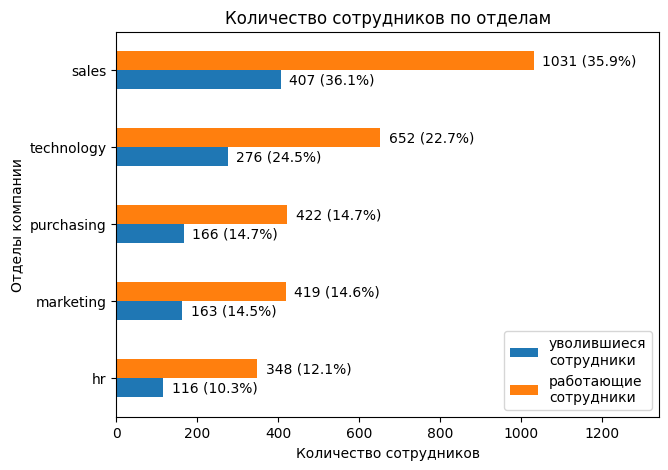

In [65]:
a = 'уволившиеся\nсотрудники'
b = 'работающие\nсотрудники'
yes = train_2[train_2['quit']=="yes"]
no = train_2[train_2['quit']=="no"]

data = {a: yes['dept'].value_counts().sort_values(),
        b: no['dept'].value_counts().sort_values()}    
    
df = barh(data=data, size_x=7, size_y=5,
          title="Количество сотрудников по отделам",
          xlabel="Количество сотрудников",
          ylabel="Отделы компании")

**Вывод:**

- Больше всего сотрудников работает в технологическом отделе и отделе продаж, меньше всего - в отделе кадров.
- В технологическом отделе увольняются чаще, в отделе кадров - реже. В остальных отделах количество уволившихся сотрудников пропорционально количеству оставшихся.

#### Уровень занимаемой должности

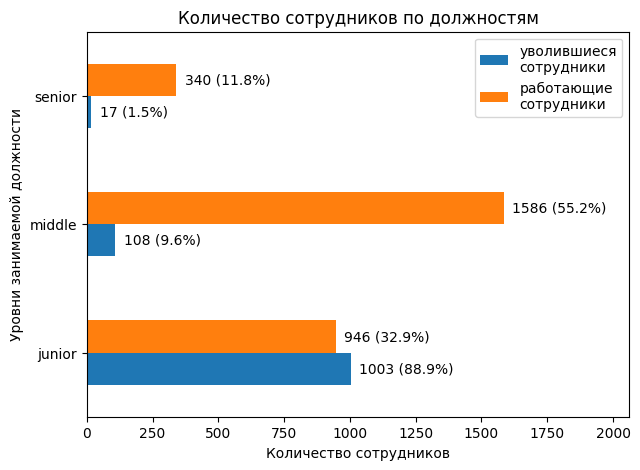

In [66]:
data = {a: yes['level'].value_counts().sort_values(),
        b: no['level'].value_counts().sort_values()}    
    
df = barh(data=data, size_x=7, size_y=5,
          title="Количество сотрудников по должностям",
          xlabel="Количество сотрудников",
          ylabel="Уровни занимаемой должности")

**Вывод:**

- Больше всего сотрудников работает на позиции middle.
- Основная часть сотрудников увольняется с позиции junior. 

#### Уровень загруженности сотрудника

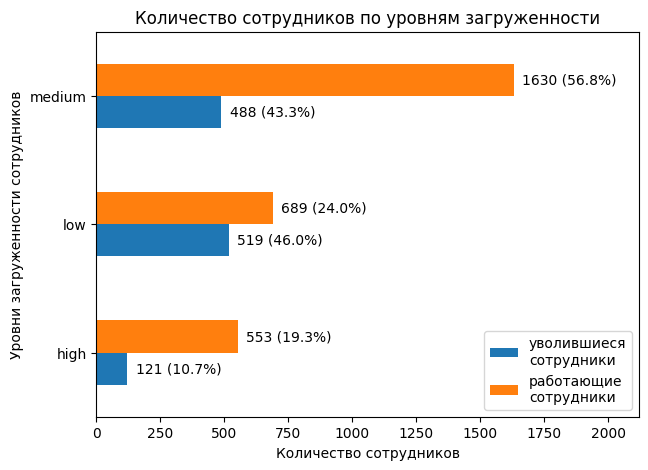

In [67]:
data = {a: yes['workload'].value_counts(),
        b: no['workload'].value_counts()}    
    
df = barh(data=data, size_x=7, size_y=5,
          title="Количество сотрудников по уровням загруженности",
          xlabel="Количество сотрудников",
          ylabel="Уровни загруженности сотрудников")

**Вывод:**

- Больше половины сотрудников имеют среднюю загруженность.
- Сотрудники с низкой загруженностью увольняются чаще всего.

#### Длительность работы в компании (в годах)

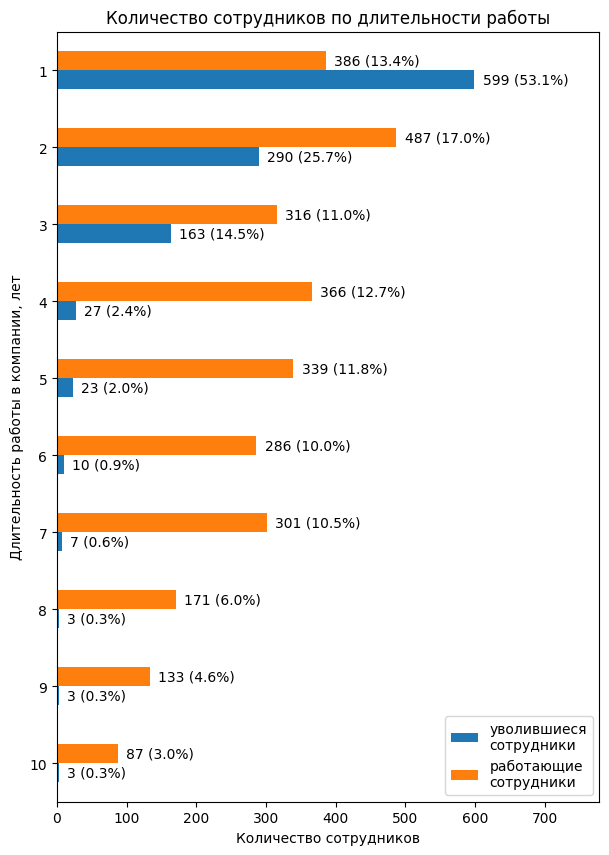

In [68]:
data = {a: yes['employment_years'].value_counts().sort_index(ascending=False),
        b: no['employment_years'].value_counts().sort_index(ascending=False)}    
    
df = barh(data=data, size_x=7, size_y=10,
          title="Количество сотрудников по длительности работы",
          xlabel="Количество сотрудников",
          ylabel="Длительность работы в компании, лет")

In [69]:
# выведем основные описательные статистики
pd.merge(yes['employment_years'].describe(), 
         no['employment_years'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_yes', '_no'))

,employment_years_yes,employment_years_no
count,1128.000000,2872.000000
mean,1.844858,4.430710
std,1.274920,2.544635
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,4.000000
75%,2.000000,6.000000
max,10.000000,10.000000


**Вывод:**

- Большая часть уволившихся сотрудников работает в компании не более года.
- Медиана длительности работы уволившихся сотрудников - 1 год, работающих - 4 года.

#### Наличие повышений в должности за последний год

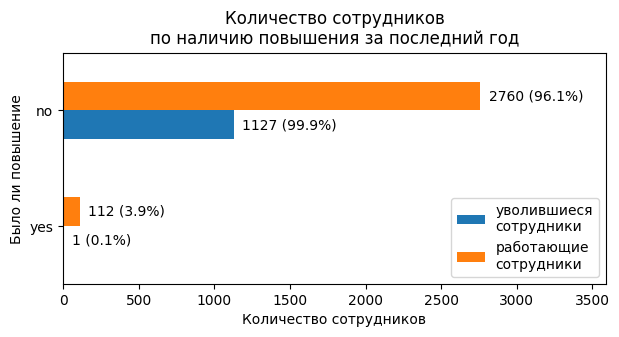

In [70]:
data = {a: yes['last_year_promo'].value_counts().sort_index(ascending=False),
        b: no['last_year_promo'].value_counts().sort_index(ascending=False)}    
    
df = barh(data=data, size_x=7, size_y=3, legend_loc='lower right', 
          title="Количество сотрудников\nпо наличию повышения за последний год",
          xlabel="Количество сотрудников",
          ylabel="Было ли повышение")

**Вывод:**

- Среди уволившихся сотрудников было лишь одно повышение, т.е. практически никого из этих сотрудников не повышали в должности.

#### Наличие нарушений трудового договора за последний год

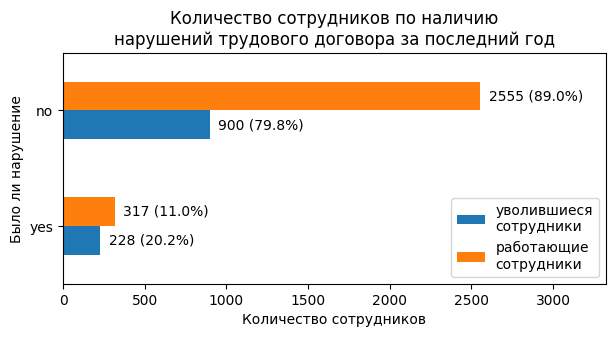

In [71]:
data = {a: yes['last_year_violations'].value_counts().sort_index(ascending=False),
        b: no['last_year_violations'].value_counts().sort_index(ascending=False)}    
    
df = barh(data=data, size_x=7, size_y=3, legend_loc='lower right', 
          title="Количество сотрудников по наличию\nнарушений трудового договора за последний год",
          xlabel="Количество сотрудников",
          ylabel="Было ли нарушение")

**Вывод:**

- Уволившиеся сотрудники чаще нарушали трудовой договор.

#### Оценка качества работы сотрудника, которую дал руководитель

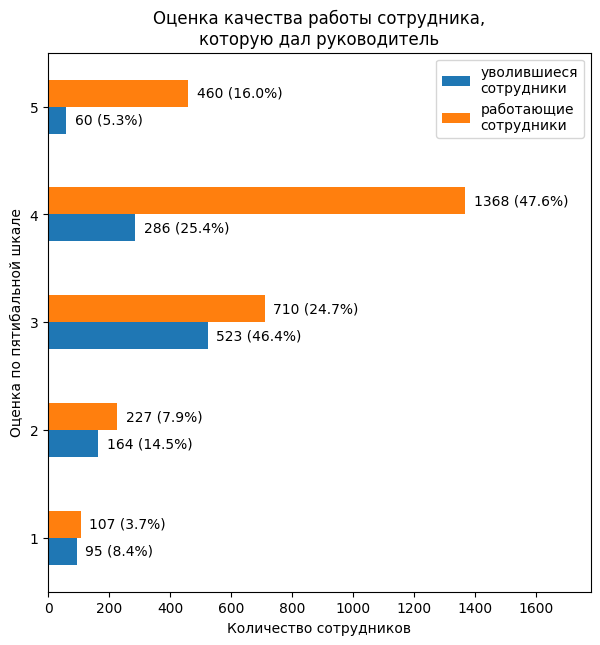

In [72]:
data = {a: yes['supervisor_evaluation'].value_counts().sort_index(),
        b: no['supervisor_evaluation'].value_counts().sort_index()}    
    
df = barh(data=data, size_x=7, size_y=7, legend_loc='best', 
          title="Оценка качества работы сотрудника,\nкоторую дал руководитель",
          xlabel="Количество сотрудников",
          ylabel="Оценка по пятибальной шкале")

In [73]:
# выведем основные описательные статистики
pd.merge(yes['supervisor_evaluation'].describe(), 
         no['supervisor_evaluation'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_yes', '_no'))

,supervisor_evaluation_yes,supervisor_evaluation_no
count,1128.000000,2872.000000
mean,3.046099,3.643106
std,0.973291,0.965295
min,1.000000,1.000000
25%,3.000000,3.000000
50%,3.000000,4.000000
75%,4.000000,4.000000
max,5.000000,5.000000


**Вывод:**

- Работу уволившихся сотрудников руководители оценивали ниже, чем оставшихся. Средние оценки: 3,05 и 3,64 соответственно.

#### Ежемесячная заработная плата сотрудника

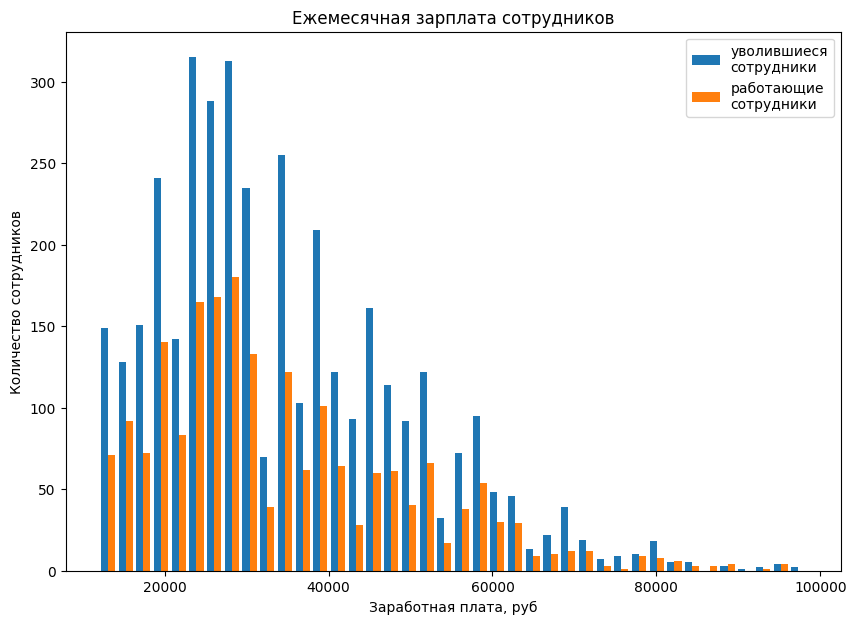

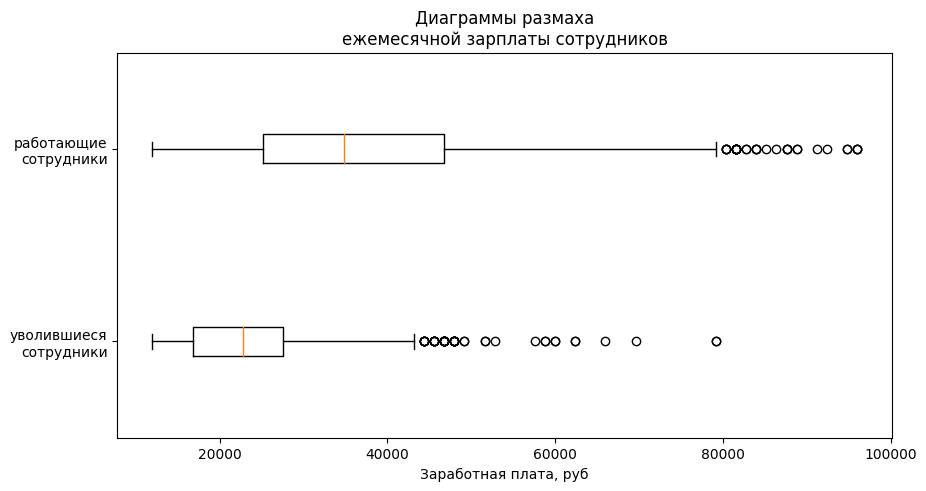

,salary_yes,salary_no
count,1128.000000,2872.000000
mean,23885.106383,37702.228412
std,9351.599505,15218.977339
min,12000.000000,12000.000000
25%,16800.000000,25200.000000
50%,22800.000000,34800.000000
75%,27600.000000,46800.000000
max,79200.000000,96000.000000


In [74]:
# построим гистограмму 
plt.hist([train_1['salary'], X_test_1_2['salary']], 
         bins=40, 
         label=[a, b])
plt.legend(loc='upper right')
plt.title('Ежемесячная зарплата сотрудников')
plt.xlabel('Заработная плата, руб')
plt.ylabel('Количество сотрудников')
fig = plt.gcf()
fig.set_size_inches(10,7) 
plt.show()

# строим диаграмму размаха 
plt.boxplot([yes['salary'], no['salary']], 
           labels=(a, b),
           vert=0)
plt.title('Диаграммы размаха\nежемесячной зарплаты сотрудников')
plt.xlabel('Заработная плата, руб')
fig = plt.gcf()
fig.set_size_inches(10,5) 
plt.show()

# выведем основные описательные статистики
pd.merge(yes['salary'].describe(), 
         no['salary'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_yes', '_no'))

**Вывод:**

- Медианная зарплата уволившихся сотрудников значительно ниже, чем работающих: 22800 руб. и 34800 руб. соответственно.
- На диаграмме размаха имеются выбросы.

####  Увольнение сотрудника из компании

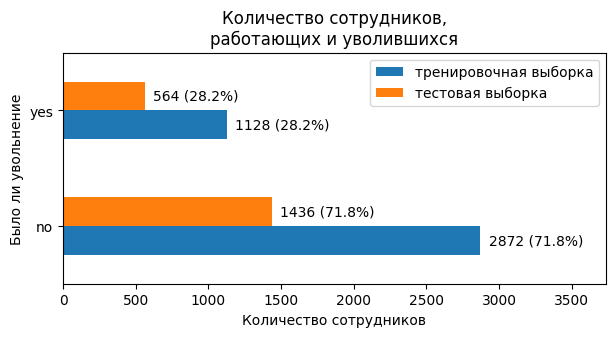

In [75]:
data = {'тренировочная выборка': train_2['quit'].value_counts().sort_index(),
        'тестовая выборка': y_test_2['quit'].value_counts().sort_index()}    
    
df = barh(data=data, size_x=7, size_y=3, legend_loc='best', 
          title="Количество сотрудников,\nработающих и уволившихся",
          xlabel="Количество сотрудников",
          ylabel="Было ли увольнение")

**Вывод:**

- Соотношение работающих и уволившихся сотрудников для тренировочной и тестовой выборок одинаковое: уволившихся - 28,2%.

#### Зависимость между уровнем удовлетворенности сотрудников и увольнением из компании

Проверим, влияет ли уровень удовлетворённости сотрудника работой в компании на то, уволится ли сотрудник.

Объединим данные датафреймов `y_test_1` и `y_test_2` и построим графики уровня удовлетворенности сотрудников с разбивкой по признаку `quit` (уволился или нет).

In [76]:
# выведем первые строки y_test_1
y_test_1.head(3)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60


In [77]:
# выведем размеры датафрейма
y_test_1.shape

(2000, 2)

In [78]:
# выведем первые строки y_test_2
y_test_2.head(3)

,id,quit
0,999029,yes
1,372846,no
2,726767,no


In [79]:
# выведем размеры датафрейма
y_test_2.shape

(2000, 2)

In [80]:
# объединим датафреймы по столбцу 'id' и выведем первые строки
df_merge = y_test_1.merge(
    y_test_2,
    on='id', 
    how='inner')

df_merge.head(3)

,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no
2,418490,0.60,yes


In [81]:
# выведем размеры нового объединенного датафрейма
df_merge.shape

(2000, 3)

Объединение прошло успешно, новый датафрейм `df_merge` готов к анализу.

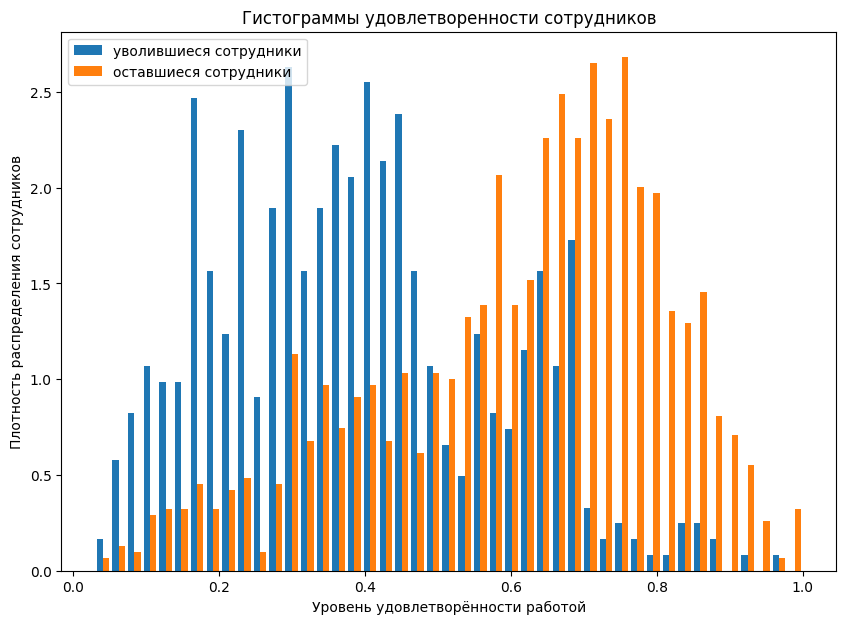

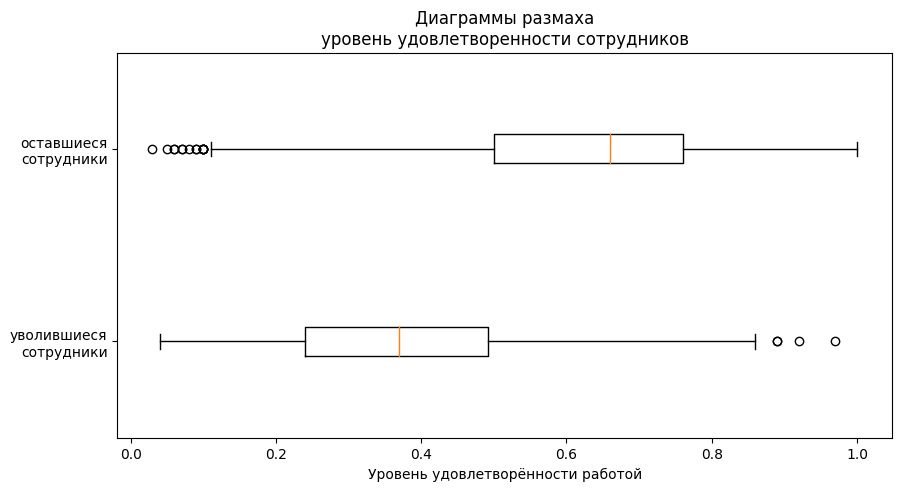

,job_satisfaction_rate_yes,job_satisfaction_rate_no
count,564.000000,1436.000000
mean,0.387713,0.612040
std,0.185784,0.199367
min,0.040000,0.030000
25%,0.240000,0.500000
50%,0.370000,0.660000
75%,0.492500,0.760000
max,0.970000,1.000000


In [82]:
yes = df_merge[df_merge['quit']=="yes"]
no = df_merge[df_merge['quit']=="no"]

# построим гистограмму 
plt.hist([yes['job_satisfaction_rate'], 
          no['job_satisfaction_rate']], 
         bins=45, 
         label=['уволившиеся сотрудники', 'оставшиеся сотрудники'],
         density=True)
plt.legend(loc='best')
plt.title('Гистограммы удовлетворенности сотрудников')
plt.xlabel('Уровень удовлетворённости работой')
plt.ylabel('Плотность распределения сотрудников')
fig = plt.gcf()
fig.set_size_inches(10,7) 
plt.show()

# строим диаграмму размаха 
plt.boxplot([yes['job_satisfaction_rate'], 
             no['job_satisfaction_rate']], 
           labels=('уволившиеся\nсотрудники','оставшиеся\nсотрудники'),
           vert=0)
plt.title('Диаграммы размаха\nуровень удовлетворенности сотрудников')
plt.xlabel('Уровень удовлетворённости работой')
fig = plt.gcf()
fig.set_size_inches(10,5) 
plt.show()

# выведем основные описательные статистики
pd.merge(yes['job_satisfaction_rate'].describe(), 
         no['job_satisfaction_rate'].describe(), 
         left_index=True, 
         right_index=True, 
         suffixes=('_yes', '_no'))

По графикам очевидно, что `чем выше уровень удовлетворенности сотрудников, тем меньше увольнений и наоборот`. Средняя удовлетворенность уволившихся сотрудников - 0,39, а оставшихся - 0,61. 

Мы исследуем не все данные, а только выборки, поэтому чтобы окончательно убедиться в нашем выводе **выполним T-тест**.

**Нулевая гипотеза:** средний уровень удовлетворенности уволившихся сотрудников не отличается от оставшихся.

**Альтернативная гипотеза:** средний уровень удовлетворенности уволившихся сотрудников ниже, чем оставшихся.

- Чтобы проверить такую гипотезу, нужно передать в метод `ttest_ind()` сначала выборку с удовлетворенностью уволившихся сотрудников `yes['job_satisfaction_rate']`, затем выборку с удовлетворенностью оставшихся сотрудников `no['job_satisfaction_rate']`. 

- В качестве `alternative` нужно указать `'less'`, то есть «среднее значение первой генеральной совокупности меньше среднего значения второй генеральной совокупности». 

- `equal_var=False`, поскольку выборки разного размера.

In [83]:
# задаём уровень значимости
alpha = 0.01

# удовлетворенность уволившихся сотрудников
first_group = yes['job_satisfaction_rate']

# удовлетворенность оставшихся
second_group = no['job_satisfaction_rate']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «меньше»
results = st.ttest_ind(first_group, second_group, alternative='less', equal_var=False)

print(f'p-значение: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.38543140157695e-101
Отвергаем нулевую гипотезу


**Вывод:**

Средний уровень удовлетворенности работой у уволившихся сотрудников ниже, чем у оставшихся с вероятностью 99%.

**Итог:**

Исследовательский анализ завершен. Данные выглядят корректными и готовыми для построения моделей МО. Отметим следующее:
- В технологическом отделе увольняются чаще, в отделе кадров - реже.
- Основная часть сотрудников увольняется с позиции junior.
- Сотрудники с низкой загруженностью увольняются чаще всего.
- Медиана длительности работы уволившихся сотрудников - 1 год, работающих - 4 года.
- Практически никого из уволившихся сотрудников не повышали в должности (только 1 человека).
- Уволившиеся сотрудники чаще нарушали трудовой договор.
- Работу уволившихся сотрудников руководители оценивали ниже, чем оставшихся. Средние оценки: 3,05 и 3,64 соответственно.
- Медианная зарплата уволившихся сотрудников значительно ниже, чем работающих: 22800 руб. и 34800 руб. соответственно.
- Средний уровень удовлетворенности работой у уволившихся сотрудников ниже, чем у оставшихся с вероятностью 99%.

### Корреляционный анализ

Построим матрицу корреляции на данных обучающей выборки train_2 с помощью библиотеки phik.

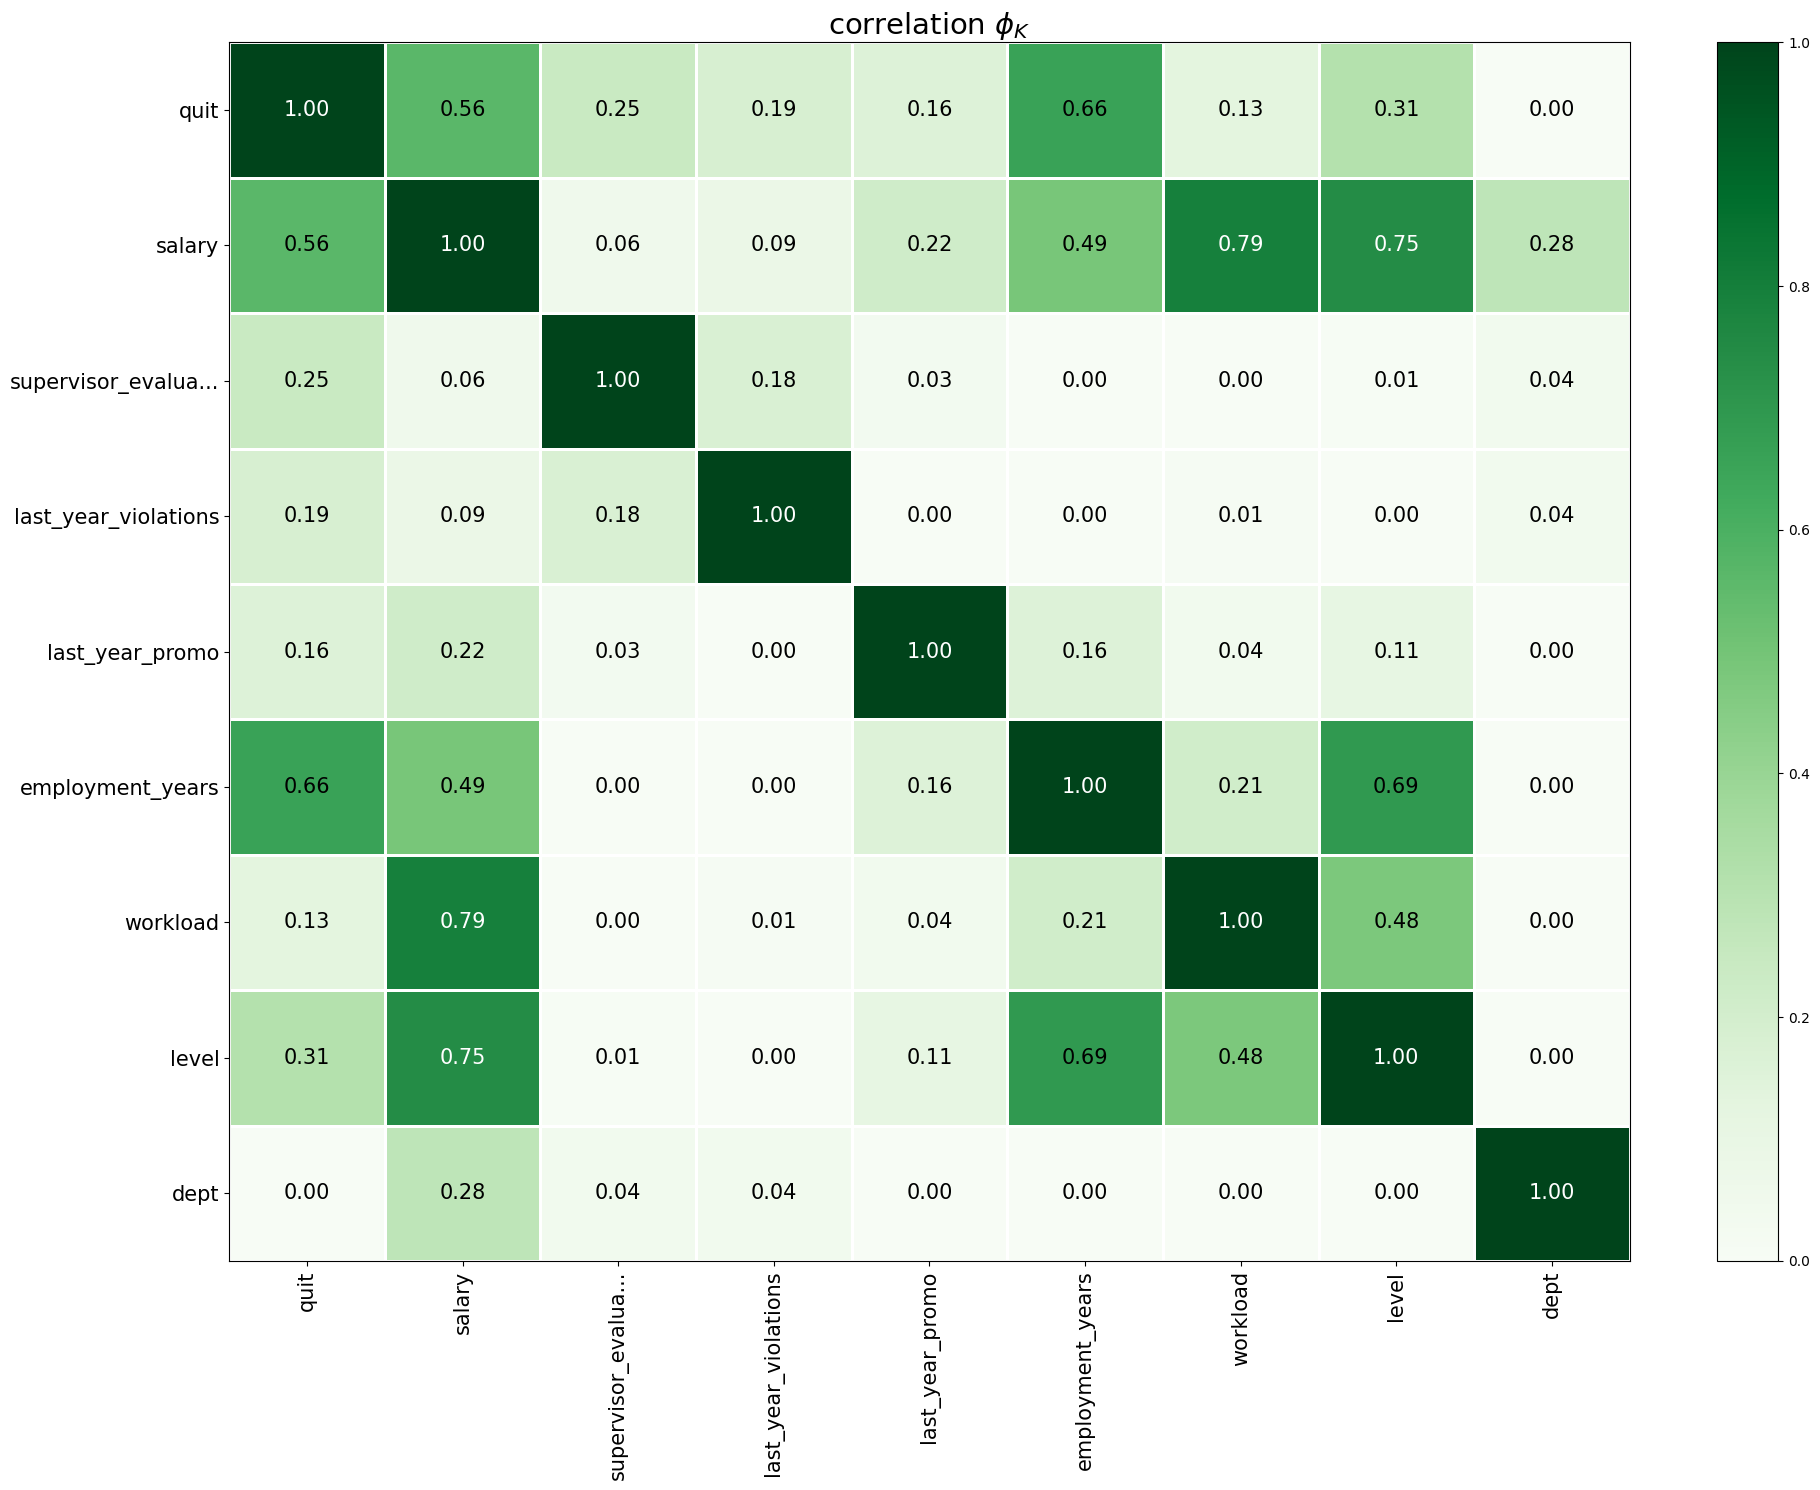

In [84]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['employment_year', 'salary']

# считаем корреляции на тренировочной выборке
phik_overview = phik_matrix(train_2.loc[:, train_2.columns != 'id'], interval_cols=interval_cols) 

# строим матрицу
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15))

**Вывод:**

- Высокую корреляцию наблюдаем между следующими признаками: 
  - зарплата и уровень занимаемой должности;
  - зарплата и уровень загруженности сотрудника;

- Целевой признак Увольнение имеет заметную корреляцию с зарплатой и длительностью работы.

- Связи между признаками недостаточно сильные, чтобы предположить наличие мультиколлинеарности. Максимальный коэффициент корреляции = 0.79. 

- Мультиколлинеарность маловероятна, данные готовы к моделированию.

### Обучение моделей

Подготовим данные и обучим 4 модели для решения задачи бинарной классификации (прогноз увольнения сотрудника):
  - KNeighborsClassifier;
  - DecisionTreeClassifier;
  - LogisticRegression;
  - SVC.  
  
Произведём анализ результатов работы моделей и выберем лучшую по метрике ROC-AUC.

Уровень удовлетворенности работой и увольнение сотрудников взаимосвязаны. Уровень удовлетворенности работой мы можем спрогнозировать, используя полученную ранее модель. Добавим эту информацию в качестве нового входного признака в модель для решения второй задачи.

В качестве исходных данных используем следующие датафреймы:
- `train_2` (файл train_quit.csv);
- `X_test_1_2` (файл test_features.csv) - используем тот же датафрейм, что и для решения первой задачи;
- `y_test_2` (файл test_target_quit.csv)

Проверим, совпадают ли столбцы id в тестовой выборке.

In [85]:
X_test_1_2['id'].equals(y_test_2['id'])

False

Значения в столбцах не соответствуют друг другу, это может быть связано с разной индексацией. Объединим данные по столбцу `'id'`, чтобы привести их в соответствие и сохраним в датафрейм `test_2`.

In [86]:
# объединяем датафреймы по столбцу 'id'
test_2 = X_test_1_2.merge(
    y_test_2,
    on='id',
    how='inner')

In [87]:
# установим в качестве индекса 'id'
train_2 = train_2.set_index('id')
test_2 = test_2.set_index('id')

In [88]:
train_2.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no


In [89]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB


In [90]:
# выведем первые строки
test_2.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no
686555,hr,junior,medium,1,no,no,4,30000,no
467458,sales,middle,low,5,no,no,4,19200,no


In [91]:
# выведем информацию о новом датафрейме
test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1997 non-null   object
 1   level                  1999 non-null   object
 2   workload               1999 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
 8   quit                   2000 non-null   object
dtypes: int64(3), object(6)
memory usage: 156.2+ KB


Объединение прошло корректно. В качестве индексов для тренировочной и тестовой выборок установлен `'id'`.

После того, как `'id'` стал индексом, проверим данные тренировочной выборки на наличие явных дубликатов.

In [92]:
# выведем количество явных дубликатов
train_2.duplicated().sum()

1413

В тренировочной выборке обнаружены дубликаты, удалим их.

In [93]:
# удалим явные дубликаты
train_2 = train_2.drop_duplicates()

In [94]:
# выведем общую информацию 
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 723290 to 692133
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   2587 non-null   object
 1   level                  2587 non-null   object
 2   workload               2587 non-null   object
 3   employment_years       2587 non-null   int64 
 4   last_year_promo        2587 non-null   object
 5   last_year_violations   2587 non-null   object
 6   supervisor_evaluation  2587 non-null   int64 
 7   salary                 2587 non-null   int64 
 8   quit                   2587 non-null   object
dtypes: int64(3), object(6)
memory usage: 202.1+ KB


Явные дубликаты удалены. Выборка значительно сократилась. Нам важно, чтобы модель делала качественный прогноз, удаление дубликатов должно этому поспособствовать. 

Списки столбцов для подготовки данных у нас уже есть из прошлой задачи. Добавляем в ранее созданный список названий столбцов количественных признаков `"job_satisfaction_rate"`.

In [95]:
num_columns.append("job_satisfaction_rate")
num_columns

['employment_years', 'salary', 'job_satisfaction_rate']

Пайплайны для предобработки данных `ohe_pipe`, `ord_pipe`, `data_preprocessor` используем из предыдущей задачи. 

Делим данные на тренировочные и тестовые.

In [96]:
X_train = train_2.drop(['quit'], axis=1)

# добавляем в тренировочную выборку столбец с прогнозным
# уровнем удовлетворенности 'job_satisfaction_rate_pred'
X_train['job_satisfaction_rate'] = randomized_search_1.predict(X_train)

# выведем первые строки
X_train.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0.650000
814010,sales,junior,medium,2,no,no,4,27600,0.846364
155091,purchasing,middle,medium,5,no,no,1,37200,0.380000


In [97]:
y_train = train_2['quit']

# обучаем кодировщик и кодируем целевой признак
label_encoder = LabelEncoder() # инициализируем модель
y_train = label_encoder.fit_transform(y_train)

# выведем y_train
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [98]:
X_test = test_2.drop(['quit'], axis=1)

# добавляем в тренировочную выборку столбец с прогнозным
# уровнем удовлетворенности 'job_satisfaction_rate_pred'
X_test['job_satisfaction_rate'] = randomized_search_1.predict(X_test)

# выведем первые строки
X_test.head(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.866667
686555,hr,junior,medium,1,no,no,4,30000,0.681429
467458,sales,middle,low,5,no,no,4,19200,0.654000


In [99]:
y_test = test_2['quit']

# кодируем целевой признак
y_test = label_encoder.transform(y_test)

# выведем y_test
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [100]:
# выведем размеры тренировочных и тестовых выборок
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2587, 9), (2587,), (2000, 9), (2000,))

Данные разделены на тренировочные и тестовые.

In [101]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# перебираем гиперпараметры моделей
param_grid = [
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
           
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 50),
        'models__max_features': range(2, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C':[0.1,1,10],
        'models__kernel':['linear'],
        'models__degree':[2],
        'models__gamma':[0.1,1,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],

    },
]

randomized_search_2 = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search_2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': [0.1, 1, 10],
                                         'models__degree': [2],
                                         'models__gamma': [0.1, 1, 10],
                                         'models__kernel': ['linear'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [102]:
print('Лучшая модель и её параметры:\n\n', randomized_search_2.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации:', randomized_search_2.best_score_)
pd.set_option('display.max_columns', None)
cv_results =  pd.DataFrame(randomized_search_2.cv_results_)[['param_models',
                                                              'mean_test_score',
                                                              'rank_test_score']]
cv_results.sort_values('rank_test_score', ascending=1)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

,param_models,mean_test_score,rank_test_score
8,DecisionTreeClassifier(random_state=42),0.899234,1
0,DecisionTreeClassifier(random_state=42),0.870006,2
2,DecisionTreeClassifier(random_state=42),0.771025,3
9,DecisionTreeClassifier(random_state=42),0.771025,3
1,DecisionTreeClassifier(random_state=42),0.770926,5
3,DecisionTreeClassifier(random_state=42),0.770576,6
6,DecisionTreeClassifier(random_state=42),0.770576,6
7,DecisionTreeClassifier(random_state=42),0.770576,6
5,DecisionTreeClassifier(random_state=42),0.770084,9
4,DecisionTreeClassifier(random_state=42),0.765970,10


In [103]:
# получим оценки вероятностей на тестовой выборке
preds = randomized_search_2.predict_proba(X_test)

# расчет метрики на тестовой выборке
print('Метрика ROC-AUC лучшей модели на тестовой выборке:', roc_auc_score(y_test, preds[:,1]).round(2))

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.92


Проверим нашу модель на адекватность, сравнив результат с предсказанием модели `DummyClassifier`.

In [104]:
# инициализируем модель DummyClassifier, обучим и получим прогноз
dummy_сlass = DummyClassifier(strategy="most_frequent")
dummy_сlass.fit(X_train, y_train)
preds = dummy_сlass.predict_proba(X_test)

print('Метрика ROC-AUC модели DummyClassifier на тестовой выборке:', roc_auc_score(y_test, preds[:,1]).round(2))

Метрика ROC-AUC модели DummyClassifier на тестовой выборке: 0.5


Наша модель показывает лучшие результаты в сравнении с DummyClassifier при стратегии "most_frequent".

**Вывод:**

Лучшая прогнозная модель для предсказания увольнения сотрудников: 

DecisionTreeClassifier(max_depth=5, max_features=10, random_state=42)

Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.92

DecisionTreeClassifier оказалась лучшей моделью. Не смотря на то, что в этот раз перед нами стояла задача бинарной классификации, а не регрессии, модель дерева решений снова оказалась лучшей, поскольку большинство входных признаков для второй задачи такие же, как и для первой. 

## Общий вывод

**В данном проекте было необходимо решить 2 основные задачи**:

1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника.
2. Построить модель, которая сможет предсказать то, что сотрудник уволится из компании.

Так же нужно было проверить гипотезу о том, что увольнение сотрудника из компании и уровень удовлетворенности работой связаны друг с другом.

**В ходе проекта мы провели следующую работу:**
- изучили данные, проверили их на предмет аномалий и несоответствий;

- произвели предобработку для последующего анализа: проверили их на пропуски и дубликаты, исправили ошибки;

- произвели исследовательский анализ основных показателей: 
  - количество сотрудников;
  - уровень занимаемой должности;
  - уровень загруженности;
  - длительность работы в компании;
  - наличие повышений в должности за последний год;
  - наличие нарушений трудового договора за последний год;
  - оценка качества работы сотрудника руководителем;
  - ежемесячная заработная плата;
  - уровень удовлетворенности работой;
  - количество увольнений;

- Произвели корреляционный анализ признаков.

- Составили портрет "уволившегося сотрудника", т. е. выяснили, в каких случаях сотрудники увольняются чаще. 

- проверили гипотезу о том, что уровень удовлетворенности сотрудника работой в компании влияет на то, уволится он или нет.

- подготовили данные и обучили 3 модели для решения задачи регрессии (прогноз уровня удовлетворённости работой):
  - LinearRegression;
  - SVR;
  - DecisionTreeRegressor.
  
- произвели анализ результатов работы моделей и выбрали лучшую модель по метрике SMAPE.

- сделали прогноз уровня удовлетворенности работой для добавления этой информации в качестве нового входного признака для решения следующей задачи.

- подготовили данные и обучили 4 модели для решения задачи бинарной классификации (прогноз увольнения сотрудника):
  - KNeighborsClassifier;
  - DecisionTreeClassifier;
  - LogisticRegression;
  - SVC.  
  
- произвели анализ результатов работы моделей и выбрали лучшую по метрике ROC-AUC.

**Результаты:**

Результат проверки гипотезы: 

- Средний уровень удовлетворенности работой у уволившихся сотрудников ниже, чем у оставшихся с вероятностью 99%.

Портрет "уволившегося" сотрудника:

- В технологическом отделе увольняются чаще, в отделе кадров - реже.
- Основная часть сотрудников увольняется с позиции junior.
- Сотрудники с низкой загруженностью увольняются чаще всего.
- Медиана длительности работы уволившихся сотрудников - 1 год, работающих - 4 года.
- Практически никого из уволившихся сотрудников не повышали в должности (только 1 человека).
- Уволившиеся сотрудники чаще нарушали трудовой договор.
- Работу уволившихся сотрудников руководители оценивали ниже, чем оставшихся. Средние оценки: 3,05 и 3,64 соответственно.
- Медианная зарплата уволившихся сотрудников значительно ниже, чем работающих: 22800 руб. и 34800 руб. соответственно.

Задача 1. Прогноз уровня удовлетворённости сотрудников:

- Лучшей моделью оказалась модель дерева решений: DecisionTreeRegressor(max_depth=45, max_features=16, random_state=42).

Метрика sMAPE лучшей модели на тестовой выборке: 14.65 при метрике r2 = 0.85.

Линейные модели более требовательны к данным и чувствительны к выбросам, необходимы линейные зависимости между входными и целевым признаком. Модель дерева решений не имеет этих недостатков и, очевидно, лучше подходит для решения нашей задачи.

Задача 2. Прогноз увольнения сотрудника:

Лучшая прогнозная модель для предсказания увольнения сотрудников: DecisionTreeClassifier(max_depth=5, max_features=10, random_state=42)

Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.92

DecisionTreeClassifier оказалась лучшей моделью. Не смотря на то, что в этот раз перед нами стояла задача бинарной классификации, а не регрессии, модель дерева решений снова оказалась лучшей, поскольку большинство входных признаков для второй задачи такие же, как и для первой.

Полученные модели являются достаточно точными для внедрения в систему мониторинга сотрудников.
  
**Рекомендации:**

Для снижения количества увольнений и повышения уровня удовлетворенности сотрудников необходимо обратить внимание, в первую очередь, на сотрудников уровня junior: 
- ввести/усовершенствовать систему наставничества;
- установить прозрачные критерии для повышения в должности и для оценки работы в целом;
- выделять отличившихся сотрудников, возможно ввести рейтинг сотрудников, оценивая их по понятным ключевым показателям;
- регулярно повышать в должности лучших сотрудников.

Эти меры позволят улучшить дисциплину и создать конкуренцию среди молодых сотрудников. Появится мотивация лучше работать и набираться новых знаний, а не заниматься поиском другого места работы.

Используя полученные модели, можно создать/дополнить систему мониторинга сотрудников, прогнозируя уровень удовлетворённости работой и увольнения.